In [2]:
import numpy as np
from scipy import signal 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import keras
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1
from sklearn import preprocessing
from keras.models import load_model
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [2]:
def function_gen(x, a, b, c, d, e, f, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12):
    y1 = a*(x**2-z1) + b*(x**2-z2) + c*(x**2-z3) + d*(x**2-z4) + e*(x**2-z5) + f*(x**2-z6)
    y2 = a*(x**2+z7) + b*(x**2+z8) + c*(x**2+z9) + d*(x**2+z10)+ e*(x**2+z11)+ f*(x**2+z12)
    return y1, y2

In [8]:
def rnn_auto(layer, size, num_encode_layers, num_decode_layers, embedding, n_step, lr = 3e-5, drop_frac=0.,bidirectional=True, l1_norm = 1e-4,**kwargs):
    """
    Function which builds the reccurrent neural network autoencoder
    Parameters
    ----------
    layer : string; options: 'lstm','gru'
        selects the layer type
    size  : numpy, int
        sets the size of encoding and decoding layers in the network
    num_encode_layers  : numpy, int
        sets the number of encoding layers in the network
    num_decode_layers : numpy, int
        sets the number of decoding layers in the network
    embedding : numpy, int
        sets the size of the embedding layer
    n_steps : numpy, int
        length of the input time series
    lr : numpy, float
        sets the learning rate for the model
    drop_frac : numpy, float
        sets the dropout fraction
    bidirectional : numpy, bool
        selects if the model is linear or bidirectional
    l1_norm : numpy. float
        sets the lambda value of the l1 normalization. The larger the value the greater the
        sparsity. None can be passed to exclude the use or l1 normailzation.
    Returns
    -------
    model : Keras, object
        Keras tensorflow model
    """

    # defines the model
    model = Sequential()

    # selects if the model is bidirectional
    if bidirectional:
        wrapper = Bidirectional
        # builds the first layer
        model.add(Bidirectional(layer(size, return_sequences=(num_encode_layers > 1),  dropout=drop_frac),
                            input_shape=(n_step, 1)))
    else:
        wrapper = lambda x: x
        # builds the first layer
        model.add(wrapper(layer(size, return_sequences=(num_encode_layers > 1),  dropout=drop_frac,
                input_shape=(n_step, 1))))

    # builds the encoding layers
    for i in range(1, num_encode_layers):
        model.add(wrapper(layer(size, return_sequences=(i < num_encode_layers - 1), dropout=drop_frac)))

    # builds the embedding layer
    if l1_norm == None:
        # embedding layer without l1 regulariization
        model.add(Dense(embedding, activation='relu', name='encoding'))
    else:
        # embedding layer with l1 regularization
        model.add(Dense(embedding, activation='relu', name='encoding',activity_regularizer=l1(l1_norm)))

    # builds the repeat vector
    model.add(RepeatVector(n_step))

    # builds the decoding layer
    for i in range(num_decode_layers):
        model.add(wrapper(layer(size, return_sequences=True, dropout=drop_frac)))

    # builds the time distributed layer to reconstruct the original input
    model.add(TimeDistributed(Dense(1, activation='linear')))

    # complies the model
    model.compile(Adam(lr), loss='mse')

    # returns the model
    return model

def train_model(model, data_train, data_test, path, epochs, batch_size):
    """
    Function which trains the neural network
    Parameters
    ----------
    model : Keras, object
        model to train
    data_train  : numpy, float
        data to train the network
    data_test  : numpy, float
        data to test the network
    path : string
        sets the folder to save the data
    epochs : numpy, int
        train the network for this number of epochs
    batch_size : numpy, int
        sets the size of the batch. Batch size should be as large as possible. The batch
        size is limited by the GPU memory.
    """

    #builds the filename
    filepath = path + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
    # sets the control of checkpoints
    checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True,
                                             save_weights_only=True, mode='min', period=1)

    # fits the model
    model.fit(np.atleast_3d(data1), np.atleast_3d(data2), epochs=250000,
          batch_size=1200, validation_data=(np.atleast_3d(data), np.atleast_3d(data)),
          callbacks=[tbCallBack, checkpoint])


In [ ]:
iList = [10,100,1000,10000,100000,1000000]
x = np.linspace(0,1,100)
netWork = [8,16,32,64,128,256,512]
eCode = [1,2,3,4,5,10]
dCode = [1,2,3,4,5,10]
eBed = [16,32]
loss = 999999999
f_y1 = []
f_y2 = []
f_fit = []
information = []
for i in iList:
   
    y1 = []
    y2 = []
    a = []
    b = []
    c = []
    d = []
    e = []
    f = []
    z1 = np.random.uniform(0,12)
    z2 = np.random.uniform(0,12)
    z3 = np.random.uniform(0,12)
    z4 = np.random.uniform(0,12)
    z5 = np.random.uniform(0,12)
    z6 = np.random.uniform(0,12)
    z7 = np.random.uniform(0,12)
    z8 = np.random.uniform(0,12)
    z9 = np.random.uniform(0,12)
    z10 = np.random.uniform(0,12)
    z11 = np.random.uniform(0,12)
    z12 = np.random.uniform(0,12)
    a_ = np.random.normal(8, 1, 1)
    b_ = np.random.normal(7, 2, 1)
    c_ = np.random.normal(6, 3, 1)
    d_ = np.random.normal(5, 4, 1)
    e_ = np.random.normal(4, 5, 1)
    f_ = np.random.normal(3, 7, 1)
            
    y1_, y2_ = function_gen(x, a_, b_, c_, d_,e_,f_,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12)
    y1.append(y1_)
    y2.append(y2_)
    a.append(a_)
    b.append(b_)
    c.append(c_)
    d.append(d_)
    e.append(e_)
    f.append(f_)
    nor_y1 = preprocessing.normalize(y1)
    nor_y2 = preprocessing.normalize(y2)
        
    for j in netWork:
        for l in eCode:
            for m in dCode:
                for n in eBed:
                    auto_test = rnn_auto(LSTM, j, l, m, n, 100)
                    model1 = auto_test.fit(np.atleast_3d(nor_y1), np.atleast_3d(nor_y2), epochs= 200, batch_size=2000)
                    if model1.history['loss'][199] < loss:
                        loss = model1.history['loss'][199]
                        auto_test.save('auto_test')
                        nor_y1_result = auto_test.predict(np.atleast_3d(nor_y1))
                        f_y1 = nor_y1
                        f_y2 = nor_y2
                        f_fit = nor_y1_result
                        information = [i,j,l,m,n]
                    
               
            
           

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.0115
Epoch 2/200
1/1 [==============================] - 0s 243ms/step - loss: 0.0114
Epoch 3/200
1/1 [==============================] - 0s 239ms/step - loss: 0.0114
Epoch 4/200
1/1 [==============================] - 0s 234ms/step - loss: 0.0113
Epoch 5/200
1/1 [==============================] - 0s 228ms/step - loss: 0.0112
Epoch 6/200
1/1 [==============================] - 0s 226ms/step - loss: 0.0111
Epoch 7/200
1/1 [==============================] - 0s 218ms/step - loss: 0.0110
Epoch 8/200
1/1 [==============================] - 0s 219ms/step - loss: 0.0110
Epoch 9/200
1/1 [==============================] - 0s 223ms/step - loss: 0.0109
Epoch 10/200
1/1 [==============================] - 0s 227ms/step - loss: 0.0108
Epoch 11/200
1/1 [==============================] - 0s 228ms/step - loss: 0.0107
Epoch 12/200
1/1 [==============================] - 0s 214ms/step - loss: 0.0106
Epoch 13/200
1/1 [======================

Epoch 103/200
1/1 [==============================] - 0s 195ms/step - loss: 0.0047
Epoch 104/200
1/1 [==============================] - 0s 209ms/step - loss: 0.0046
Epoch 105/200
1/1 [==============================] - 0s 201ms/step - loss: 0.0046
Epoch 106/200
1/1 [==============================] - 0s 203ms/step - loss: 0.0045
Epoch 107/200
1/1 [==============================] - 0s 206ms/step - loss: 0.0045
Epoch 108/200
1/1 [==============================] - 0s 199ms/step - loss: 0.0044
Epoch 109/200
1/1 [==============================] - 0s 202ms/step - loss: 0.0044
Epoch 110/200
1/1 [==============================] - 0s 201ms/step - loss: 0.0043
Epoch 111/200
1/1 [==============================] - 0s 211ms/step - loss: 0.0043
Epoch 112/200
1/1 [==============================] - 0s 203ms/step - loss: 0.0042
Epoch 113/200
1/1 [==============================] - 0s 204ms/step - loss: 0.0042
Epoch 114/200
1/1 [==============================] - 0s 208ms/step - loss: 0.0041
Epoch 115/200
1/

Epoch 3/200
1/1 [==============================] - 0s 262ms/step - loss: 0.0091
Epoch 4/200
1/1 [==============================] - 0s 261ms/step - loss: 0.0090
Epoch 5/200
1/1 [==============================] - 0s 258ms/step - loss: 0.0089
Epoch 6/200
1/1 [==============================] - 0s 249ms/step - loss: 0.0088
Epoch 7/200
1/1 [==============================] - 0s 250ms/step - loss: 0.0086
Epoch 8/200
1/1 [==============================] - 0s 247ms/step - loss: 0.0085
Epoch 9/200
1/1 [==============================] - 0s 248ms/step - loss: 0.0084
Epoch 10/200
1/1 [==============================] - 0s 245ms/step - loss: 0.0083
Epoch 11/200
1/1 [==============================] - 0s 244ms/step - loss: 0.0082
Epoch 12/200
1/1 [==============================] - 0s 244ms/step - loss: 0.0081
Epoch 13/200
1/1 [==============================] - 0s 240ms/step - loss: 0.0080
Epoch 14/200
1/1 [==============================] - 0s 237ms/step - loss: 0.0079
Epoch 15/200
1/1 [=================

Epoch 105/200
1/1 [==============================] - 0s 193ms/step - loss: 0.0018
Epoch 106/200
1/1 [==============================] - 0s 201ms/step - loss: 0.0018
Epoch 107/200
1/1 [==============================] - 0s 199ms/step - loss: 0.0018
Epoch 108/200
1/1 [==============================] - 0s 198ms/step - loss: 0.0017
Epoch 109/200
1/1 [==============================] - 0s 193ms/step - loss: 0.0017
Epoch 110/200
1/1 [==============================] - 0s 198ms/step - loss: 0.0017
Epoch 111/200
1/1 [==============================] - 0s 205ms/step - loss: 0.0016
Epoch 112/200
1/1 [==============================] - 0s 195ms/step - loss: 0.0016
Epoch 113/200
1/1 [==============================] - 0s 204ms/step - loss: 0.0016
Epoch 114/200
1/1 [==============================] - 0s 198ms/step - loss: 0.0015
Epoch 115/200
1/1 [==============================] - 0s 193ms/step - loss: 0.0015
Epoch 116/200
1/1 [==============================] - 0s 198ms/step - loss: 0.0015
Epoch 117/200
1/

Epoch 2/200
1/1 [==============================] - 0s 353ms/step - loss: 0.0069
Epoch 3/200
1/1 [==============================] - 0s 345ms/step - loss: 0.0068
Epoch 4/200
1/1 [==============================] - 0s 338ms/step - loss: 0.0067
Epoch 5/200
1/1 [==============================] - 0s 337ms/step - loss: 0.0066
Epoch 6/200
1/1 [==============================] - 0s 335ms/step - loss: 0.0065
Epoch 7/200
1/1 [==============================] - 0s 311ms/step - loss: 0.0064
Epoch 8/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0063
Epoch 9/200
1/1 [==============================] - 0s 309ms/step - loss: 0.0062
Epoch 10/200
1/1 [==============================] - 0s 306ms/step - loss: 0.0061
Epoch 11/200
1/1 [==============================] - 0s 307ms/step - loss: 0.0061
Epoch 12/200
1/1 [==============================] - 0s 307ms/step - loss: 0.0060
Epoch 13/200
1/1 [==============================] - 0s 298ms/step - loss: 0.0059
Epoch 14/200
1/1 [==================

Epoch 104/200
1/1 [==============================] - 0s 273ms/step - loss: 0.0011
Epoch 105/200
1/1 [==============================] - 0s 277ms/step - loss: 0.0010
Epoch 106/200
1/1 [==============================] - 0s 283ms/step - loss: 0.0010
Epoch 107/200
1/1 [==============================] - 0s 272ms/step - loss: 0.0010
Epoch 108/200
1/1 [==============================] - 0s 275ms/step - loss: 9.8420e-04
Epoch 109/200
1/1 [==============================] - 0s 268ms/step - loss: 9.6462e-04
Epoch 110/200
1/1 [==============================] - 0s 280ms/step - loss: 9.4558e-04
Epoch 111/200
1/1 [==============================] - 0s 279ms/step - loss: 9.2700e-04
Epoch 112/200
1/1 [==============================] - 0s 290ms/step - loss: 9.0895e-04
Epoch 113/200
1/1 [==============================] - 0s 266ms/step - loss: 8.9139e-04
Epoch 114/200
1/1 [==============================] - 0s 273ms/step - loss: 8.7432e-04
Epoch 115/200
1/1 [==============================] - 0s 278ms/step - l

Epoch 200/200
1/1 [==============================] - 0s 276ms/step - loss: 4.2048e-04
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0089
Epoch 2/200
1/1 [==============================] - 0s 342ms/step - loss: 0.0088
Epoch 3/200
1/1 [==============================] - 0s 339ms/step - loss: 0.0088
Epoch 4/200
1/1 [==============================] - 0s 335ms/step - loss: 0.0087
Epoch 5/200
1/1 [==============================] - 0s 321ms/step - loss: 0.0086
Epoch 6/200
1/1 [==============================] - 0s 318ms/step - loss: 0.0085
Epoch 7/200
1/1 [==============================] - 0s 312ms/step - loss: 0.0085
Epoch 8/200
1/1 [==============================] - 0s 313ms/step - loss: 0.0084
Epoch 9/200
1/1 [==============================] - 0s 296ms/step - loss: 0.0083
Epoch 10/200
1/1 [==============================] - 0s 297ms/step - loss: 0.0082
Epoch 11/200
1/1 [==============================] - 0s 288ms/step - loss: 0.0082
Epoch 12/200
1/1 [=================

Epoch 102/200
1/1 [==============================] - 0s 276ms/step - loss: 0.0028
Epoch 103/200
1/1 [==============================] - 0s 273ms/step - loss: 0.0027
Epoch 104/200
1/1 [==============================] - 0s 262ms/step - loss: 0.0027
Epoch 105/200
1/1 [==============================] - 0s 274ms/step - loss: 0.0026
Epoch 106/200
1/1 [==============================] - 0s 271ms/step - loss: 0.0026
Epoch 107/200
1/1 [==============================] - 0s 283ms/step - loss: 0.0025
Epoch 108/200
1/1 [==============================] - 0s 279ms/step - loss: 0.0025
Epoch 109/200
1/1 [==============================] - 0s 276ms/step - loss: 0.0025
Epoch 110/200
1/1 [==============================] - 0s 265ms/step - loss: 0.0024
Epoch 111/200
1/1 [==============================] - 0s 265ms/step - loss: 0.0024
Epoch 112/200
1/1 [==============================] - 0s 270ms/step - loss: 0.0023
Epoch 113/200
1/1 [==============================] - 0s 276ms/step - loss: 0.0023
Epoch 114/200
1/

Epoch 200/200
1/1 [==============================] - 0s 273ms/step - loss: 4.5761e-04
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0099
Epoch 2/200
1/1 [==============================] - 0s 476ms/step - loss: 0.0098
Epoch 3/200
1/1 [==============================] - 0s 473ms/step - loss: 0.0096
Epoch 4/200
1/1 [==============================] - 0s 473ms/step - loss: 0.0095
Epoch 5/200
1/1 [==============================] - 0s 471ms/step - loss: 0.0094
Epoch 6/200
1/1 [==============================] - 0s 468ms/step - loss: 0.0093
Epoch 7/200
1/1 [==============================] - 0s 466ms/step - loss: 0.0092
Epoch 8/200
1/1 [==============================] - 0s 465ms/step - loss: 0.0091
Epoch 9/200
1/1 [==============================] - 0s 465ms/step - loss: 0.0090
Epoch 10/200
1/1 [==============================] - 0s 462ms/step - loss: 0.0089
Epoch 11/200
1/1 [==============================] - 0s 460ms/step - loss: 0.0088
Epoch 12/200
1/1 [=================

Epoch 102/200
1/1 [==============================] - 0s 419ms/step - loss: 0.0020
Epoch 103/200
1/1 [==============================] - 0s 416ms/step - loss: 0.0019
Epoch 104/200
1/1 [==============================] - 0s 421ms/step - loss: 0.0019
Epoch 105/200
1/1 [==============================] - 0s 418ms/step - loss: 0.0018
Epoch 106/200
1/1 [==============================] - 0s 420ms/step - loss: 0.0018
Epoch 107/200
1/1 [==============================] - 0s 420ms/step - loss: 0.0018
Epoch 108/200
1/1 [==============================] - 0s 419ms/step - loss: 0.0017
Epoch 109/200
1/1 [==============================] - 0s 420ms/step - loss: 0.0017
Epoch 110/200
1/1 [==============================] - 0s 421ms/step - loss: 0.0016
Epoch 111/200
1/1 [==============================] - 0s 419ms/step - loss: 0.0016
Epoch 112/200
1/1 [==============================] - 0s 415ms/step - loss: 0.0016
Epoch 113/200
1/1 [==============================] - 0s 423ms/step - loss: 0.0015
Epoch 114/200
1/

Epoch 199/200
1/1 [==============================] - 0s 405ms/step - loss: 6.1745e-04
Epoch 200/200
1/1 [==============================] - 0s 396ms/step - loss: 6.1534e-04
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0097
Epoch 2/200
1/1 [==============================] - 0s 471ms/step - loss: 0.0095
Epoch 3/200
1/1 [==============================] - 0s 467ms/step - loss: 0.0094
Epoch 4/200
1/1 [==============================] - 0s 463ms/step - loss: 0.0093
Epoch 5/200
1/1 [==============================] - 0s 458ms/step - loss: 0.0092
Epoch 6/200
1/1 [==============================] - 0s 454ms/step - loss: 0.0090
Epoch 7/200
1/1 [==============================] - 0s 449ms/step - loss: 0.0089
Epoch 8/200
1/1 [==============================] - 0s 455ms/step - loss: 0.0088
Epoch 9/200
1/1 [==============================] - 0s 450ms/step - loss: 0.0086
Epoch 10/200
1/1 [==============================] - 0s 451ms/step - loss: 0.0085
Epoch 11/200
1/1 [============

1/1 [==============================] - 0s 434ms/step - loss: 0.0015
Epoch 101/200
1/1 [==============================] - 0s 438ms/step - loss: 0.0014
Epoch 102/200
1/1 [==============================] - 0s 434ms/step - loss: 0.0014
Epoch 103/200
1/1 [==============================] - 0s 436ms/step - loss: 0.0014
Epoch 104/200
1/1 [==============================] - 0s 433ms/step - loss: 0.0013
Epoch 105/200
1/1 [==============================] - 0s 433ms/step - loss: 0.0013
Epoch 106/200
1/1 [==============================] - 0s 435ms/step - loss: 0.0013
Epoch 107/200
1/1 [==============================] - 0s 434ms/step - loss: 0.0012
Epoch 108/200
1/1 [==============================] - 0s 437ms/step - loss: 0.0012
Epoch 109/200
1/1 [==============================] - 0s 434ms/step - loss: 0.0012
Epoch 110/200
1/1 [==============================] - 0s 433ms/step - loss: 0.0011
Epoch 111/200
1/1 [==============================] - 0s 435ms/step - loss: 0.0011
Epoch 112/200
1/1 [===========

1/1 [==============================] - 0s 421ms/step - loss: 3.5384e-04
Epoch 197/200
1/1 [==============================] - 0s 412ms/step - loss: 3.5339e-04
Epoch 198/200
1/1 [==============================] - 0s 415ms/step - loss: 3.5297e-04
Epoch 199/200
1/1 [==============================] - 0s 413ms/step - loss: 3.5257e-04
Epoch 200/200
1/1 [==============================] - 0s 416ms/step - loss: 3.5220e-04
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.0104
Epoch 2/200
1/1 [==============================] - 1s 581ms/step - loss: 0.0103
Epoch 3/200
1/1 [==============================] - 1s 574ms/step - loss: 0.0102
Epoch 4/200
1/1 [==============================] - 1s 569ms/step - loss: 0.0101
Epoch 5/200
1/1 [==============================] - 1s 569ms/step - loss: 0.0100
Epoch 6/200
1/1 [==============================] - 1s 565ms/step - loss: 0.0099
Epoch 7/200
1/1 [==============================] - 1s 560ms/step - loss: 0.0098
Epoch 8/200
1/1 [==========

1/1 [==============================] - 0s 478ms/step - loss: 0.0032
Epoch 98/200
1/1 [==============================] - 0s 480ms/step - loss: 0.0031
Epoch 99/200
1/1 [==============================] - 0s 472ms/step - loss: 0.0031
Epoch 100/200
1/1 [==============================] - 0s 466ms/step - loss: 0.0030
Epoch 101/200
1/1 [==============================] - 0s 466ms/step - loss: 0.0029
Epoch 102/200
1/1 [==============================] - 0s 466ms/step - loss: 0.0029
Epoch 103/200
1/1 [==============================] - 0s 477ms/step - loss: 0.0028
Epoch 104/200
1/1 [==============================] - 0s 475ms/step - loss: 0.0028
Epoch 105/200
1/1 [==============================] - 0s 450ms/step - loss: 0.0027
Epoch 106/200
1/1 [==============================] - 0s 457ms/step - loss: 0.0027
Epoch 107/200
1/1 [==============================] - 0s 471ms/step - loss: 0.0026
Epoch 108/200
1/1 [==============================] - 0s 467ms/step - loss: 0.0026
Epoch 109/200
1/1 [=============

Epoch 195/200
1/1 [==============================] - 0s 466ms/step - loss: 3.8528e-04
Epoch 196/200
1/1 [==============================] - 0s 465ms/step - loss: 3.8301e-04
Epoch 197/200
1/1 [==============================] - 0s 472ms/step - loss: 3.8091e-04
Epoch 198/200
1/1 [==============================] - 0s 451ms/step - loss: 3.7897e-04
Epoch 199/200
1/1 [==============================] - 0s 455ms/step - loss: 3.7719e-04
Epoch 200/200
1/1 [==============================] - 0s 468ms/step - loss: 3.7554e-04
Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.0079
Epoch 2/200
1/1 [==============================] - 1s 579ms/step - loss: 0.0077
Epoch 3/200
1/1 [==============================] - 1s 579ms/step - loss: 0.0076
Epoch 4/200
1/1 [==============================] - 1s 576ms/step - loss: 0.0075
Epoch 5/200
1/1 [==============================] - 1s 564ms/step - loss: 0.0074
Epoch 6/200
1/1 [==============================] - 1s 546ms/step - loss: 0.0073
Epoch 7

Epoch 96/200
1/1 [==============================] - 0s 468ms/step - loss: 9.4930e-04
Epoch 97/200
1/1 [==============================] - 0s 474ms/step - loss: 9.2266e-04
Epoch 98/200
1/1 [==============================] - 0s 474ms/step - loss: 8.9691e-04
Epoch 99/200
1/1 [==============================] - 0s 485ms/step - loss: 8.7206e-04
Epoch 100/200
1/1 [==============================] - 0s 456ms/step - loss: 8.4807e-04
Epoch 101/200
1/1 [==============================] - 0s 484ms/step - loss: 8.2498e-04
Epoch 102/200
1/1 [==============================] - 0s 464ms/step - loss: 8.0276e-04
Epoch 103/200
1/1 [==============================] - 0s 471ms/step - loss: 7.8139e-04
Epoch 104/200
1/1 [==============================] - 0s 480ms/step - loss: 7.6084e-04
Epoch 105/200
1/1 [==============================] - 0s 479ms/step - loss: 7.4110e-04
Epoch 106/200
1/1 [==============================] - 0s 488ms/step - loss: 7.2216e-04
Epoch 107/200
1/1 [==============================] - 0s 48

Epoch 192/200
1/1 [==============================] - 0s 476ms/step - loss: 3.9676e-04
Epoch 193/200
1/1 [==============================] - 0s 472ms/step - loss: 3.9663e-04
Epoch 194/200
1/1 [==============================] - 0s 456ms/step - loss: 3.9650e-04
Epoch 195/200
1/1 [==============================] - 0s 466ms/step - loss: 3.9636e-04
Epoch 196/200
1/1 [==============================] - 0s 453ms/step - loss: 3.9623e-04
Epoch 197/200
1/1 [==============================] - 0s 464ms/step - loss: 3.9610e-04
Epoch 198/200
1/1 [==============================] - 0s 463ms/step - loss: 3.9596e-04
Epoch 199/200
1/1 [==============================] - 0s 458ms/step - loss: 3.9583e-04
Epoch 200/200
1/1 [==============================] - 0s 454ms/step - loss: 3.9569e-04
Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.0105
Epoch 2/200
1/1 [==============================] - 1s 694ms/step - loss: 0.0104
Epoch 3/200
1/1 [==============================] - 1s 687ms/step - lo

Epoch 93/200
1/1 [==============================] - 1s 572ms/step - loss: 0.0024
Epoch 94/200
1/1 [==============================] - 1s 580ms/step - loss: 0.0024
Epoch 95/200
1/1 [==============================] - 1s 590ms/step - loss: 0.0023
Epoch 96/200
1/1 [==============================] - 1s 592ms/step - loss: 0.0022
Epoch 97/200
1/1 [==============================] - 1s 587ms/step - loss: 0.0022
Epoch 98/200
1/1 [==============================] - 1s 593ms/step - loss: 0.0021
Epoch 99/200
1/1 [==============================] - 1s 600ms/step - loss: 0.0021
Epoch 100/200
1/1 [==============================] - 1s 589ms/step - loss: 0.0020
Epoch 101/200
1/1 [==============================] - 1s 578ms/step - loss: 0.0019
Epoch 102/200
1/1 [==============================] - 1s 589ms/step - loss: 0.0019
Epoch 103/200
1/1 [==============================] - 1s 597ms/step - loss: 0.0018
Epoch 104/200
1/1 [==============================] - 1s 577ms/step - loss: 0.0018
Epoch 105/200
1/1 [====

Epoch 190/200
1/1 [==============================] - 1s 580ms/step - loss: 4.2247e-04
Epoch 191/200
1/1 [==============================] - 1s 570ms/step - loss: 4.2225e-04
Epoch 192/200
1/1 [==============================] - 1s 576ms/step - loss: 4.2202e-04
Epoch 193/200
1/1 [==============================] - 1s 581ms/step - loss: 4.2180e-04
Epoch 194/200
1/1 [==============================] - 1s 572ms/step - loss: 4.2157e-04
Epoch 195/200
1/1 [==============================] - 1s 571ms/step - loss: 4.2134e-04
Epoch 196/200
1/1 [==============================] - 1s 579ms/step - loss: 4.2110e-04
Epoch 197/200
1/1 [==============================] - 1s 590ms/step - loss: 4.2087e-04
Epoch 198/200
1/1 [==============================] - 1s 588ms/step - loss: 4.2063e-04
Epoch 199/200
1/1 [==============================] - 1s 598ms/step - loss: 4.2039e-04
Epoch 200/200
1/1 [==============================] - 1s 583ms/step - loss: 4.2015e-04
Epoch 1/200
1/1 [==============================] - 4s 

Epoch 91/200
1/1 [==============================] - 1s 580ms/step - loss: 0.0015
Epoch 92/200
1/1 [==============================] - 1s 599ms/step - loss: 0.0015
Epoch 93/200
1/1 [==============================] - 1s 597ms/step - loss: 0.0015
Epoch 94/200
1/1 [==============================] - 1s 588ms/step - loss: 0.0014
Epoch 95/200
1/1 [==============================] - 1s 587ms/step - loss: 0.0014
Epoch 96/200
1/1 [==============================] - 1s 577ms/step - loss: 0.0014
Epoch 97/200
1/1 [==============================] - 1s 591ms/step - loss: 0.0013
Epoch 98/200
1/1 [==============================] - 1s 597ms/step - loss: 0.0013
Epoch 99/200
1/1 [==============================] - 1s 596ms/step - loss: 0.0013
Epoch 100/200
1/1 [==============================] - 1s 582ms/step - loss: 0.0012
Epoch 101/200
1/1 [==============================] - 1s 592ms/step - loss: 0.0012
Epoch 102/200
1/1 [==============================] - 1s 596ms/step - loss: 0.0012
Epoch 103/200
1/1 [======

1/1 [==============================] - 1s 560ms/step - loss: 3.3098e-04
Epoch 188/200
1/1 [==============================] - 1s 586ms/step - loss: 3.3076e-04
Epoch 189/200
1/1 [==============================] - 1s 581ms/step - loss: 3.3056e-04
Epoch 190/200
1/1 [==============================] - 1s 586ms/step - loss: 3.3037e-04
Epoch 191/200
1/1 [==============================] - 1s 581ms/step - loss: 3.3019e-04
Epoch 192/200
1/1 [==============================] - 1s 561ms/step - loss: 3.3002e-04
Epoch 193/200
1/1 [==============================] - 1s 575ms/step - loss: 3.2987e-04
Epoch 194/200
1/1 [==============================] - 1s 569ms/step - loss: 3.2972e-04
Epoch 195/200
1/1 [==============================] - 1s 571ms/step - loss: 3.2957e-04
Epoch 196/200
1/1 [==============================] - 1s 584ms/step - loss: 3.2944e-04
Epoch 197/200
1/1 [==============================] - 1s 546ms/step - loss: 3.2930e-04
Epoch 198/200
1/1 [==============================] - 1s 540ms/step -

Epoch 91/200
1/1 [==============================] - 1s 1s/step - loss: 0.0011
Epoch 92/200
1/1 [==============================] - 1s 995ms/step - loss: 0.0011
Epoch 93/200
1/1 [==============================] - 1s 1s/step - loss: 0.0010
Epoch 94/200
1/1 [==============================] - 1s 1s/step - loss: 9.8021e-04
Epoch 95/200
1/1 [==============================] - 1s 1s/step - loss: 9.3858e-04
Epoch 96/200
1/1 [==============================] - 1s 1s/step - loss: 8.9925e-04
Epoch 97/200
1/1 [==============================] - 1s 1s/step - loss: 8.6222e-04
Epoch 98/200
1/1 [==============================] - 1s 998ms/step - loss: 8.2745e-04
Epoch 99/200
1/1 [==============================] - 1s 1s/step - loss: 7.9492e-04
Epoch 100/200
1/1 [==============================] - 1s 1s/step - loss: 7.6458e-04
Epoch 101/200
1/1 [==============================] - 1s 1s/step - loss: 7.3639e-04
Epoch 102/200
1/1 [==============================] - 1s 1s/step - loss: 7.1030e-04
Epoch 103/200
1/1 [

1/1 [==============================] - 1s 1s/step - loss: 4.5926e-04
Epoch 190/200
1/1 [==============================] - 1s 984ms/step - loss: 4.5856e-04
Epoch 191/200
1/1 [==============================] - 1s 1s/step - loss: 4.5786e-04
Epoch 192/200
1/1 [==============================] - 1s 1s/step - loss: 4.5716e-04
Epoch 193/200
1/1 [==============================] - 1s 977ms/step - loss: 4.5647e-04
Epoch 194/200
1/1 [==============================] - 1s 1s/step - loss: 4.5577e-04
Epoch 195/200
1/1 [==============================] - 1s 999ms/step - loss: 4.5507e-04
Epoch 196/200
1/1 [==============================] - 1s 981ms/step - loss: 4.5437e-04
Epoch 197/200
1/1 [==============================] - 1s 992ms/step - loss: 4.5367e-04
Epoch 198/200
1/1 [==============================] - 1s 1s/step - loss: 4.5296e-04
Epoch 199/200
1/1 [==============================] - 1s 993ms/step - loss: 4.5226e-04
Epoch 200/200
1/1 [==============================] - 1s 1s/step - loss: 4.5156e-04


1/1 [==============================] - 1s 1s/step - loss: 8.5968e-04
Epoch 93/200
1/1 [==============================] - 1s 1s/step - loss: 8.5733e-04
Epoch 94/200
1/1 [==============================] - 1s 1s/step - loss: 8.5480e-04
Epoch 95/200
1/1 [==============================] - 1s 1s/step - loss: 8.5212e-04
Epoch 96/200
1/1 [==============================] - 1s 1s/step - loss: 8.4931e-04
Epoch 97/200
1/1 [==============================] - 1s 1s/step - loss: 8.4641e-04
Epoch 98/200
1/1 [==============================] - 1s 1s/step - loss: 8.4345e-04
Epoch 99/200
1/1 [==============================] - 1s 1s/step - loss: 8.4046e-04
Epoch 100/200
1/1 [==============================] - 1s 1s/step - loss: 8.3747e-04
Epoch 101/200
1/1 [==============================] - 1s 1s/step - loss: 8.3450e-04
Epoch 102/200
1/1 [==============================] - 1s 1s/step - loss: 8.3157e-04
Epoch 103/200
1/1 [==============================] - 1s 1s/step - loss: 8.2869e-04
Epoch 104/200
1/1 [======

Epoch 191/200
1/1 [==============================] - 1s 996ms/step - loss: 6.7173e-04
Epoch 192/200
1/1 [==============================] - 1s 1s/step - loss: 6.7031e-04
Epoch 193/200
1/1 [==============================] - 1s 1s/step - loss: 6.6890e-04
Epoch 194/200
1/1 [==============================] - 1s 1s/step - loss: 6.6750e-04
Epoch 195/200
1/1 [==============================] - 1s 1s/step - loss: 6.6610e-04
Epoch 196/200
1/1 [==============================] - 1s 1s/step - loss: 6.6471e-04
Epoch 197/200
1/1 [==============================] - 1s 985ms/step - loss: 6.6332e-04
Epoch 198/200
1/1 [==============================] - 1s 1s/step - loss: 6.6194e-04
Epoch 199/200
1/1 [==============================] - 1s 1s/step - loss: 6.6057e-04
Epoch 200/200
1/1 [==============================] - 1s 1s/step - loss: 6.5920e-04
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0121
Epoch 2/200
1/1 [==============================] - 0s 352ms/step - loss: 0.0120
Epoch 3

Epoch 92/200
1/1 [==============================] - 0s 320ms/step - loss: 0.0069
Epoch 93/200
1/1 [==============================] - 0s 319ms/step - loss: 0.0068
Epoch 94/200
1/1 [==============================] - 0s 318ms/step - loss: 0.0068
Epoch 95/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0067
Epoch 96/200
1/1 [==============================] - 0s 319ms/step - loss: 0.0067
Epoch 97/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0066
Epoch 98/200
1/1 [==============================] - 0s 319ms/step - loss: 0.0066
Epoch 99/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0066
Epoch 100/200
1/1 [==============================] - 0s 320ms/step - loss: 0.0065
Epoch 101/200
1/1 [==============================] - 0s 319ms/step - loss: 0.0065
Epoch 102/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0064
Epoch 103/200
1/1 [==============================] - 0s 316ms/step - loss: 0.0064
Epoch 104/200
1/1 [=====

1/1 [==============================] - 0s 315ms/step - loss: 0.0032
Epoch 193/200
1/1 [==============================] - 0s 318ms/step - loss: 0.0031
Epoch 194/200
1/1 [==============================] - 0s 314ms/step - loss: 0.0031
Epoch 195/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0031
Epoch 196/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0030
Epoch 197/200
1/1 [==============================] - 0s 315ms/step - loss: 0.0030
Epoch 198/200
1/1 [==============================] - 0s 317ms/step - loss: 0.0030
Epoch 199/200
1/1 [==============================] - 0s 316ms/step - loss: 0.0030
Epoch 200/200
1/1 [==============================] - 0s 314ms/step - loss: 0.0029
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0087
Epoch 2/200
1/1 [==============================] - 0s 353ms/step - loss: 0.0086
Epoch 3/200
1/1 [==============================] - 0s 339ms/step - loss: 0.0086
Epoch 4/200
1/1 [======================

Epoch 94/200
1/1 [==============================] - 0s 293ms/step - loss: 0.0028
Epoch 95/200
1/1 [==============================] - 0s 292ms/step - loss: 0.0028
Epoch 96/200
1/1 [==============================] - 0s 287ms/step - loss: 0.0028
Epoch 97/200
1/1 [==============================] - 0s 302ms/step - loss: 0.0027
Epoch 98/200
1/1 [==============================] - 0s 292ms/step - loss: 0.0027
Epoch 99/200
1/1 [==============================] - 0s 290ms/step - loss: 0.0026
Epoch 100/200
1/1 [==============================] - 0s 300ms/step - loss: 0.0026
Epoch 101/200
1/1 [==============================] - 0s 294ms/step - loss: 0.0025
Epoch 102/200
1/1 [==============================] - 0s 295ms/step - loss: 0.0025
Epoch 103/200
1/1 [==============================] - 0s 296ms/step - loss: 0.0024
Epoch 104/200
1/1 [==============================] - 0s 295ms/step - loss: 0.0024
Epoch 105/200
1/1 [==============================] - 0s 297ms/step - loss: 0.0024
Epoch 106/200
1/1 [===

Epoch 192/200
1/1 [==============================] - 0s 285ms/step - loss: 2.8322e-04
Epoch 193/200
1/1 [==============================] - 0s 289ms/step - loss: 2.7575e-04
Epoch 194/200
1/1 [==============================] - 0s 294ms/step - loss: 2.6853e-04
Epoch 195/200
1/1 [==============================] - 0s 291ms/step - loss: 2.6157e-04
Epoch 196/200
1/1 [==============================] - 0s 284ms/step - loss: 2.5485e-04
Epoch 197/200
1/1 [==============================] - 0s 283ms/step - loss: 2.4838e-04
Epoch 198/200
1/1 [==============================] - 0s 271ms/step - loss: 2.4214e-04
Epoch 199/200
1/1 [==============================] - 0s 283ms/step - loss: 2.3613e-04
Epoch 200/200
1/1 [==============================] - 0s 288ms/step - loss: 2.3035e-04
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0095
Epoch 2/200
1/1 [==============================] - 0s 465ms/step - loss: 0.0094
Epoch 3/200
1/1 [==============================] - 0s 458ms/step - lo

Epoch 93/200
1/1 [==============================] - 0s 394ms/step - loss: 0.0050
Epoch 94/200
1/1 [==============================] - 0s 392ms/step - loss: 0.0050
Epoch 95/200
1/1 [==============================] - 0s 392ms/step - loss: 0.0050
Epoch 96/200
1/1 [==============================] - 0s 392ms/step - loss: 0.0049
Epoch 97/200
1/1 [==============================] - 0s 393ms/step - loss: 0.0049
Epoch 98/200
1/1 [==============================] - 0s 380ms/step - loss: 0.0048
Epoch 99/200
1/1 [==============================] - 0s 400ms/step - loss: 0.0048
Epoch 100/200
1/1 [==============================] - 0s 396ms/step - loss: 0.0048
Epoch 101/200
1/1 [==============================] - 0s 397ms/step - loss: 0.0047
Epoch 102/200
1/1 [==============================] - 0s 393ms/step - loss: 0.0047
Epoch 103/200
1/1 [==============================] - 0s 397ms/step - loss: 0.0046
Epoch 104/200
1/1 [==============================] - 0s 390ms/step - loss: 0.0046
Epoch 105/200
1/1 [====

Epoch 193/200
1/1 [==============================] - 0s 369ms/step - loss: 0.0017
Epoch 194/200
1/1 [==============================] - 0s 385ms/step - loss: 0.0017
Epoch 195/200
1/1 [==============================] - 0s 368ms/step - loss: 0.0016
Epoch 196/200
1/1 [==============================] - 0s 366ms/step - loss: 0.0016
Epoch 197/200
1/1 [==============================] - 0s 375ms/step - loss: 0.0016
Epoch 198/200
1/1 [==============================] - 0s 376ms/step - loss: 0.0016
Epoch 199/200
1/1 [==============================] - 0s 375ms/step - loss: 0.0015
Epoch 200/200
1/1 [==============================] - 0s 380ms/step - loss: 0.0015
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.0055
Epoch 2/200
1/1 [==============================] - 0s 449ms/step - loss: 0.0053
Epoch 3/200
1/1 [==============================] - 0s 443ms/step - loss: 0.0052
Epoch 4/200
1/1 [==============================] - 0s 439ms/step - loss: 0.0051
Epoch 5/200
1/1 [==========

Epoch 93/200
1/1 [==============================] - 0s 346ms/step - loss: 4.1543e-04
Epoch 94/200
1/1 [==============================] - 0s 352ms/step - loss: 4.0888e-04
Epoch 95/200
1/1 [==============================] - 0s 368ms/step - loss: 4.0271e-04
Epoch 96/200
1/1 [==============================] - 0s 362ms/step - loss: 3.9691e-04
Epoch 97/200
1/1 [==============================] - 0s 376ms/step - loss: 3.9145e-04
Epoch 98/200
1/1 [==============================] - 0s 365ms/step - loss: 3.8633e-04
Epoch 99/200
1/1 [==============================] - 0s 373ms/step - loss: 3.8152e-04
Epoch 100/200
1/1 [==============================] - 0s 371ms/step - loss: 3.7701e-04
Epoch 101/200
1/1 [==============================] - 0s 381ms/step - loss: 3.7281e-04
Epoch 102/200
1/1 [==============================] - 0s 367ms/step - loss: 3.6889e-04
Epoch 103/200
1/1 [==============================] - 0s 369ms/step - loss: 3.6522e-04
Epoch 104/200
1/1 [==============================] - 0s 383ms

Epoch 189/200
1/1 [==============================] - 0s 356ms/step - loss: 3.1353e-04
Epoch 190/200
1/1 [==============================] - 0s 365ms/step - loss: 3.1339e-04
Epoch 191/200
1/1 [==============================] - 0s 359ms/step - loss: 3.1325e-04
Epoch 192/200
1/1 [==============================] - 0s 366ms/step - loss: 3.1312e-04
Epoch 193/200
1/1 [==============================] - 0s 364ms/step - loss: 3.1298e-04
Epoch 194/200
1/1 [==============================] - 0s 378ms/step - loss: 3.1284e-04
Epoch 195/200
1/1 [==============================] - 0s 369ms/step - loss: 3.1270e-04
Epoch 196/200
1/1 [==============================] - 0s 366ms/step - loss: 3.1256e-04
Epoch 197/200
1/1 [==============================] - 0s 355ms/step - loss: 3.1242e-04
Epoch 198/200
1/1 [==============================] - 0s 382ms/step - loss: 3.1228e-04
Epoch 199/200
1/1 [==============================] - 0s 374ms/step - loss: 3.1214e-04
Epoch 200/200
1/1 [==============================] - 0

Epoch 90/200
1/1 [==============================] - 1s 505ms/step - loss: 0.0018
Epoch 91/200
1/1 [==============================] - 1s 509ms/step - loss: 0.0017
Epoch 92/200
1/1 [==============================] - 1s 514ms/step - loss: 0.0017
Epoch 93/200
1/1 [==============================] - 1s 508ms/step - loss: 0.0016
Epoch 94/200
1/1 [==============================] - 1s 510ms/step - loss: 0.0016
Epoch 95/200
1/1 [==============================] - 1s 505ms/step - loss: 0.0015
Epoch 96/200
1/1 [==============================] - 1s 514ms/step - loss: 0.0015
Epoch 97/200
1/1 [==============================] - 0s 481ms/step - loss: 0.0014
Epoch 98/200
1/1 [==============================] - 1s 504ms/step - loss: 0.0014
Epoch 99/200
1/1 [==============================] - 0s 495ms/step - loss: 0.0013
Epoch 100/200
1/1 [==============================] - 1s 500ms/step - loss: 0.0013
Epoch 101/200
1/1 [==============================] - 0s 500ms/step - loss: 0.0013
Epoch 102/200
1/1 [=======

Epoch 187/200
1/1 [==============================] - 1s 501ms/step - loss: 4.4675e-04
Epoch 188/200
1/1 [==============================] - 1s 505ms/step - loss: 4.4620e-04
Epoch 189/200
1/1 [==============================] - 0s 499ms/step - loss: 4.4565e-04
Epoch 190/200
1/1 [==============================] - 0s 499ms/step - loss: 4.4511e-04
Epoch 191/200
1/1 [==============================] - 1s 505ms/step - loss: 4.4456e-04
Epoch 192/200
1/1 [==============================] - 0s 499ms/step - loss: 4.4401e-04
Epoch 193/200
1/1 [==============================] - 0s 496ms/step - loss: 4.4347e-04
Epoch 194/200
1/1 [==============================] - 0s 499ms/step - loss: 4.4292e-04
Epoch 195/200
1/1 [==============================] - 1s 504ms/step - loss: 4.4237e-04
Epoch 196/200
1/1 [==============================] - 0s 499ms/step - loss: 4.4183e-04
Epoch 197/200
1/1 [==============================] - 0s 493ms/step - loss: 4.4128e-04
Epoch 198/200
1/1 [==============================] - 0

Epoch 88/200
1/1 [==============================] - 0s 446ms/step - loss: 0.0016
Epoch 89/200
1/1 [==============================] - 0s 458ms/step - loss: 0.0015
Epoch 90/200
1/1 [==============================] - 0s 463ms/step - loss: 0.0015
Epoch 91/200
1/1 [==============================] - 0s 470ms/step - loss: 0.0015
Epoch 92/200
1/1 [==============================] - 0s 459ms/step - loss: 0.0014
Epoch 93/200
1/1 [==============================] - 0s 447ms/step - loss: 0.0014
Epoch 94/200
1/1 [==============================] - 0s 451ms/step - loss: 0.0014
Epoch 95/200
1/1 [==============================] - 0s 458ms/step - loss: 0.0013
Epoch 96/200
1/1 [==============================] - 0s 456ms/step - loss: 0.0013
Epoch 97/200
1/1 [==============================] - 0s 460ms/step - loss: 0.0013
Epoch 98/200
1/1 [==============================] - 0s 441ms/step - loss: 0.0013
Epoch 99/200
1/1 [==============================] - 0s 453ms/step - loss: 0.0012
Epoch 100/200
1/1 [=========

Epoch 185/200
1/1 [==============================] - 0s 450ms/step - loss: 7.9771e-04
Epoch 186/200
1/1 [==============================] - 0s 456ms/step - loss: 7.9657e-04
Epoch 187/200
1/1 [==============================] - 0s 451ms/step - loss: 7.9542e-04
Epoch 188/200
1/1 [==============================] - 0s 467ms/step - loss: 7.9428e-04
Epoch 189/200
1/1 [==============================] - 0s 453ms/step - loss: 7.9314e-04
Epoch 190/200
1/1 [==============================] - 0s 454ms/step - loss: 7.9199e-04
Epoch 191/200
1/1 [==============================] - 0s 453ms/step - loss: 7.9085e-04
Epoch 192/200
1/1 [==============================] - 0s 447ms/step - loss: 7.8970e-04
Epoch 193/200
1/1 [==============================] - 0s 464ms/step - loss: 7.8856e-04
Epoch 194/200
1/1 [==============================] - 0s 462ms/step - loss: 7.8741e-04
Epoch 195/200
1/1 [==============================] - 0s 449ms/step - loss: 7.8627e-04
Epoch 196/200
1/1 [==============================] - 0

Epoch 86/200
1/1 [==============================] - 1s 603ms/step - loss: 0.0027
Epoch 87/200
1/1 [==============================] - 1s 598ms/step - loss: 0.0026
Epoch 88/200
1/1 [==============================] - 1s 597ms/step - loss: 0.0025
Epoch 89/200
1/1 [==============================] - 1s 593ms/step - loss: 0.0025
Epoch 90/200
1/1 [==============================] - 1s 593ms/step - loss: 0.0024
Epoch 91/200
1/1 [==============================] - 1s 605ms/step - loss: 0.0024
Epoch 92/200
1/1 [==============================] - 1s 603ms/step - loss: 0.0023
Epoch 93/200
1/1 [==============================] - 1s 605ms/step - loss: 0.0023
Epoch 94/200
1/1 [==============================] - 1s 607ms/step - loss: 0.0022
Epoch 95/200
1/1 [==============================] - 1s 586ms/step - loss: 0.0022
Epoch 96/200
1/1 [==============================] - 1s 604ms/step - loss: 0.0021
Epoch 97/200
1/1 [==============================] - 1s 583ms/step - loss: 0.0021
Epoch 98/200
1/1 [==========

Epoch 184/200
1/1 [==============================] - 1s 570ms/step - loss: 3.4402e-04
Epoch 185/200
1/1 [==============================] - 1s 554ms/step - loss: 3.4281e-04
Epoch 186/200
1/1 [==============================] - 1s 565ms/step - loss: 3.4169e-04
Epoch 187/200
1/1 [==============================] - 1s 566ms/step - loss: 3.4065e-04
Epoch 188/200
1/1 [==============================] - 1s 564ms/step - loss: 3.3969e-04
Epoch 189/200
1/1 [==============================] - 1s 567ms/step - loss: 3.3880e-04
Epoch 190/200
1/1 [==============================] - 1s 573ms/step - loss: 3.3797e-04
Epoch 191/200
1/1 [==============================] - 1s 567ms/step - loss: 3.3720e-04
Epoch 192/200
1/1 [==============================] - 1s 556ms/step - loss: 3.3649e-04
Epoch 193/200
1/1 [==============================] - 1s 571ms/step - loss: 3.3583e-04
Epoch 194/200
1/1 [==============================] - 1s 569ms/step - loss: 3.3521e-04
Epoch 195/200
1/1 [==============================] - 1

Epoch 85/200
1/1 [==============================] - 1s 573ms/step - loss: 0.0013
Epoch 86/200
1/1 [==============================] - 1s 578ms/step - loss: 0.0013
Epoch 87/200
1/1 [==============================] - 1s 571ms/step - loss: 0.0012
Epoch 88/200
1/1 [==============================] - 1s 569ms/step - loss: 0.0012
Epoch 89/200
1/1 [==============================] - 1s 559ms/step - loss: 0.0011
Epoch 90/200
1/1 [==============================] - 1s 570ms/step - loss: 0.0011
Epoch 91/200
1/1 [==============================] - 1s 544ms/step - loss: 0.0011
Epoch 92/200
1/1 [==============================] - 1s 571ms/step - loss: 0.0010
Epoch 93/200
1/1 [==============================] - 1s 564ms/step - loss: 9.9805e-04
Epoch 94/200
1/1 [==============================] - 1s 545ms/step - loss: 9.6587e-04
Epoch 95/200
1/1 [==============================] - 1s 556ms/step - loss: 9.3462e-04
Epoch 96/200
1/1 [==============================] - 1s 575ms/step - loss: 9.0439e-04
Epoch 97/200

Epoch 181/200
1/1 [==============================] - 1s 560ms/step - loss: 3.2201e-04
Epoch 182/200
1/1 [==============================] - 1s 550ms/step - loss: 3.2192e-04
Epoch 183/200
1/1 [==============================] - 1s 560ms/step - loss: 3.2182e-04
Epoch 184/200
1/1 [==============================] - 1s 543ms/step - loss: 3.2173e-04
Epoch 185/200
1/1 [==============================] - 1s 556ms/step - loss: 3.2164e-04
Epoch 186/200
1/1 [==============================] - 1s 562ms/step - loss: 3.2155e-04
Epoch 187/200
1/1 [==============================] - 1s 557ms/step - loss: 3.2145e-04
Epoch 188/200
1/1 [==============================] - 1s 558ms/step - loss: 3.2136e-04
Epoch 189/200
1/1 [==============================] - 1s 554ms/step - loss: 3.2127e-04
Epoch 190/200
1/1 [==============================] - 1s 547ms/step - loss: 3.2117e-04
Epoch 191/200
1/1 [==============================] - 1s 562ms/step - loss: 3.2108e-04
Epoch 192/200
1/1 [==============================] - 1

1/1 [==============================] - 1s 673ms/step - loss: 0.0033
Epoch 82/200
1/1 [==============================] - 1s 666ms/step - loss: 0.0032
Epoch 83/200
1/1 [==============================] - 1s 662ms/step - loss: 0.0031
Epoch 84/200
1/1 [==============================] - 1s 652ms/step - loss: 0.0031
Epoch 85/200
1/1 [==============================] - 1s 668ms/step - loss: 0.0030
Epoch 86/200
1/1 [==============================] - 1s 658ms/step - loss: 0.0029
Epoch 87/200
1/1 [==============================] - 1s 675ms/step - loss: 0.0029
Epoch 88/200
1/1 [==============================] - 1s 664ms/step - loss: 0.0028
Epoch 89/200
1/1 [==============================] - 1s 652ms/step - loss: 0.0027
Epoch 90/200
1/1 [==============================] - 1s 666ms/step - loss: 0.0027
Epoch 91/200
1/1 [==============================] - 1s 655ms/step - loss: 0.0026
Epoch 92/200
1/1 [==============================] - 1s 656ms/step - loss: 0.0025
Epoch 93/200
1/1 [=======================

Epoch 179/200
1/1 [==============================] - 1s 662ms/step - loss: 3.4828e-04
Epoch 180/200
1/1 [==============================] - 1s 652ms/step - loss: 3.4791e-04
Epoch 181/200
1/1 [==============================] - 1s 658ms/step - loss: 3.4760e-04
Epoch 182/200
1/1 [==============================] - 1s 667ms/step - loss: 3.4734e-04
Epoch 183/200
1/1 [==============================] - 1s 636ms/step - loss: 3.4712e-04
Epoch 184/200
1/1 [==============================] - 1s 661ms/step - loss: 3.4692e-04
Epoch 185/200
1/1 [==============================] - 1s 662ms/step - loss: 3.4673e-04
Epoch 186/200
1/1 [==============================] - 1s 669ms/step - loss: 3.4655e-04
Epoch 187/200
1/1 [==============================] - 1s 660ms/step - loss: 3.4638e-04
Epoch 188/200
1/1 [==============================] - 1s 654ms/step - loss: 3.4620e-04
Epoch 189/200
1/1 [==============================] - 1s 653ms/step - loss: 3.4602e-04
Epoch 190/200
1/1 [==============================] - 1

Epoch 79/200
1/1 [==============================] - 1s 656ms/step - loss: 0.0032
Epoch 80/200
1/1 [==============================] - 1s 642ms/step - loss: 0.0031
Epoch 81/200
1/1 [==============================] - 1s 638ms/step - loss: 0.0031
Epoch 82/200
1/1 [==============================] - 1s 626ms/step - loss: 0.0030
Epoch 83/200
1/1 [==============================] - 1s 638ms/step - loss: 0.0029
Epoch 84/200
1/1 [==============================] - 1s 648ms/step - loss: 0.0029
Epoch 85/200
1/1 [==============================] - 1s 655ms/step - loss: 0.0028
Epoch 86/200
1/1 [==============================] - 1s 618ms/step - loss: 0.0027
Epoch 87/200
1/1 [==============================] - 1s 654ms/step - loss: 0.0027
Epoch 88/200
1/1 [==============================] - 1s 641ms/step - loss: 0.0026
Epoch 89/200
1/1 [==============================] - 1s 646ms/step - loss: 0.0025
Epoch 90/200
1/1 [==============================] - 1s 633ms/step - loss: 0.0025
Epoch 91/200
1/1 [==========

Epoch 177/200
1/1 [==============================] - 1s 643ms/step - loss: 3.8402e-04
Epoch 178/200
1/1 [==============================] - 1s 645ms/step - loss: 3.8356e-04
Epoch 179/200
1/1 [==============================] - 1s 633ms/step - loss: 3.8313e-04
Epoch 180/200
1/1 [==============================] - 1s 635ms/step - loss: 3.8273e-04
Epoch 181/200
1/1 [==============================] - 1s 618ms/step - loss: 3.8236e-04
Epoch 182/200
1/1 [==============================] - 1s 640ms/step - loss: 3.8201e-04
Epoch 183/200
1/1 [==============================] - 1s 631ms/step - loss: 3.8168e-04
Epoch 184/200
1/1 [==============================] - 1s 643ms/step - loss: 3.8137e-04
Epoch 185/200
1/1 [==============================] - 1s 610ms/step - loss: 3.8107e-04
Epoch 186/200
1/1 [==============================] - 1s 637ms/step - loss: 3.8078e-04
Epoch 187/200
1/1 [==============================] - 1s 614ms/step - loss: 3.8050e-04
Epoch 188/200
1/1 [==============================] - 1

Epoch 80/200
1/1 [==============================] - 1s 1s/step - loss: 9.7531e-04
Epoch 81/200
1/1 [==============================] - 1s 1s/step - loss: 9.4225e-04
Epoch 82/200
1/1 [==============================] - 1s 1s/step - loss: 9.1201e-04
Epoch 83/200
1/1 [==============================] - 1s 1s/step - loss: 8.8449e-04
Epoch 84/200
1/1 [==============================] - 1s 1s/step - loss: 8.5962e-04
Epoch 85/200
1/1 [==============================] - 1s 1s/step - loss: 8.3729e-04
Epoch 86/200
1/1 [==============================] - 1s 1s/step - loss: 8.1737e-04
Epoch 87/200
1/1 [==============================] - 1s 1s/step - loss: 7.9975e-04
Epoch 88/200
1/1 [==============================] - 1s 1s/step - loss: 7.8428e-04
Epoch 89/200
1/1 [==============================] - 1s 1s/step - loss: 7.7081e-04
Epoch 90/200
1/1 [==============================] - 1s 1s/step - loss: 7.5919e-04
Epoch 91/200
1/1 [==============================] - 1s 1s/step - loss: 7.4926e-04
Epoch 92/200
1/1

Epoch 179/200
1/1 [==============================] - 1s 1s/step - loss: 5.6698e-04
Epoch 180/200
1/1 [==============================] - 1s 1s/step - loss: 5.6534e-04
Epoch 181/200
1/1 [==============================] - 1s 1s/step - loss: 5.6370e-04
Epoch 182/200
1/1 [==============================] - 1s 1s/step - loss: 5.6206e-04
Epoch 183/200
1/1 [==============================] - 1s 1s/step - loss: 5.6042e-04
Epoch 184/200
1/1 [==============================] - 1s 1s/step - loss: 5.5879e-04
Epoch 185/200
1/1 [==============================] - 1s 1s/step - loss: 5.5716e-04
Epoch 186/200
1/1 [==============================] - 1s 1s/step - loss: 5.5553e-04
Epoch 187/200
1/1 [==============================] - 1s 1s/step - loss: 5.5390e-04
Epoch 188/200
1/1 [==============================] - 1s 1s/step - loss: 5.5228e-04
Epoch 189/200
1/1 [==============================] - 1s 1s/step - loss: 5.5066e-04
Epoch 190/200
1/1 [==============================] - 1s 1s/step - loss: 5.4905e-04
Epoc

NameError: name 'f_y2' is not defined

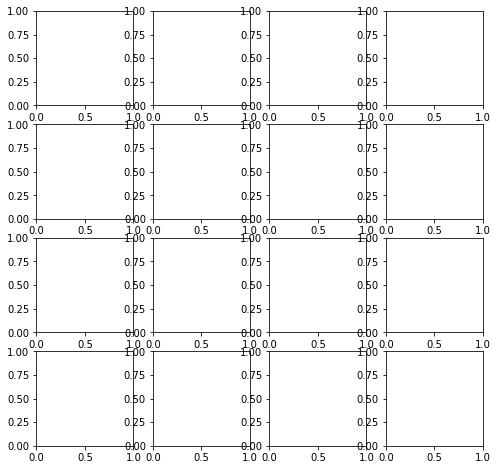

In [6]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs.reshape(-1)
for i in range (0,4):
    for j in range(0,4):
        k = np.random.randint(0, f_fit.shape[0])
        ax = axs[i,j]
        ax.plot(x,f_y2[k],'r-')
        ax.plot(x,f_fit[k],'b-')
        ax.plot(x,f_y1[k],'g-')

In [7]:
nor_y1_result = auto_test.predict(np.atleast_3d(nor_y1))

NameError: name 'auto_test' is not defined